<a href="https://colab.research.google.com/github/riskydav/Orbit-Future-Academy/blob/main/23_Statistical_Test%26Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Senin, 11 Oktober 2021

# 1) Contoh Kasus Uji Beda
Sebuah lembaga pelatihan bahasa inggris ingin mengetahui apakah pelatihan mereka berhasil meningkatkan skor TOEFL pesertanya. Mereka lalu menganalisa skor TOEFL sebelum dan sesudah pelatihan. Dengan tingkat kepercayaan 95%, apakah pelatihan ini berhasil?

![alt text](https://drive.google.com/uc?id=1QN1HbirK1jx5hwlFVEGJUHM64GNjuS1p)




In [1]:
#Library
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
%matplotlib inline  

Membuat hipotesis

Ho : Nilai TOEFL sesudah pelatihan <= sebelum pelatihan

Ha : Nilai TOEFL sesudah pelatihan > sebelum pelatihan

In [2]:
toefl = pd.read_csv('https://raw.githubusercontent.com/riskydav/Orbit-Future-Academy/main/Dataset/skor_toefl.csv')
toefl

,Sebelum,Sesudah
0,429,569
1,443,599
2,408,612
3,459,536
4,401,572
...,...,...
94,496,552
95,413,544
96,400,531
97,471,561


Menentukan uji statistik

![alt text](https://drive.google.com/uc?id=1asHY6TCNsltT7O8H6CmlEqQxQPgKH-6d)

Meski datanya ada 2, namun masih dari orang yang sama sehingga termasuk uji beda 2 kelompok berhubungan. Datanya numerik dan jumlahnya juga cukup banyak sehingga menurut teorema limit pusat yang dibahas minggu lalu, distribusi datanya mendekati normal. Menurut tabel diatas, uji statistik yang sesuai adalah "paired sample t-test". Di python uji ini tersedia di scipy.stats dengan nama "ttest_rel"

In [3]:
#Melakukan uji t
uji_t = stats.ttest_rel(toefl['Sesudah'], toefl['Sebelum']) #hasilnya: (statistik hitungnya (t-hitung), pvalue)
print('nilai t-hitung = ', uji_t[0])
print('nilai p-value = ', uji_t[1])

nilai t-hitung =  30.255038012916643
nilai p-value =  1.638101871655264e-51


Berdasarkan hasil diatas, p-value = 1,6 x 10^(-51) < alpha (5%). Maka Ho ditolak, terdapat peningkatan yang signifikan dari TOEFL bahasa Inggris peserta pelatihan

# 2) Contoh dimensionality reduction (Latihan untuk student)
Pada latihan ini kita akan mengklasifikasi data genre musik. Disini kita akan membuat beberapa model KNN dengan menggunakan data asli dan data yang dimensinya sudah direduksi. Tugas kalian adalah membandingkan akurasi dan lama training antara data asli dan data yang sudah direduksi.

In [5]:
music = pd.read_csv('https://raw.githubusercontent.com/riskydav/Orbit-Future-Academy/main/Dataset/music_genre.csv')
music2 = music.copy()
music2.dropna(inplace=True)
del music2['Artist Name']
del music2['Track Name']
music2

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [6]:
#Memisahkan Feature dan Label
#Feature
X = music2.iloc[:,:14].values
Y = music2.iloc[:, 14].values

In [7]:
scaler = StandardScaler()

# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.6578634  -0.86108     0.59301271 ... -0.22000411  0.33481231
   0.22582345]
 [-0.48893955 -0.54783734 -0.2323635  ...  0.8410691  -0.89146753
   0.22582345]
 [ 0.59750535 -2.15621793  1.25744056 ...  2.5868942   0.14687296
   0.22582345]
 ...
 [-0.5492976   0.19912594  1.28220184 ... -0.6092036   0.02828982
   0.22582345]
 [-0.85108785 -1.86707086  0.55587078 ...  0.28659404  0.05825067
   0.22582345]
 [-0.00607515 -0.75264985  0.75396107 ...  0.51558089 -0.26514691
   0.22582345]]


## Feature Selection dengan uji statistik
Disini kita akan memilih beberapa feature saja yang dianggap penting untuk nantinya digunakan untuk membuat model. Berbeda dengan PCA dan LDA, kita tidak mentransformasi data, hanya menggunakan sebagiannya saja. 

Karena labelnya kategorik, maka kita bisa menggunakan uji beda. Karena datanya banyak dan jumlah grupnya lebih dari 2, maka disini kita menggunakan ANOVA. Berikut contoh kodingan untuk feature selection dengan uji statistik yang tersedia di library 'sklearn.feature_selection'

In [8]:
# Memilih berapa k feature yang mau digunakan
selector = SelectKBest(f_classif, k=7)  #pilih k feature terbaik berdasarkan nilai statistik uji ANOVA tertinggi
selector.fit(X_scaled, Y)
X_new_a= selector.fit_transform(X_scaled, Y)  # k feature terbaik sudah terpilih
print("nilai statistik hitung tiap feature : ", selector.scores_)
print('\n', "nilai pvalue : ", selector.pvalues_)

nilai statistik hitung tiap feature :  [139.88066056 327.57607032 607.05627169   3.44940318 533.23015937
  17.36126483 240.43782283 702.69800751 307.34168538  25.06319532
 208.2249501   28.89657946 931.21961423  25.14183356]

 nilai pvalue :  [5.67588919e-278 0.00000000e+000 0.00000000e+000 1.54594261e-004
 0.00000000e+000 8.80419429e-032 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.36713016e-047 0.00000000e+000 1.72827268e-055
 0.00000000e+000 9.41651367e-048]


## PCA
Sebelum menentukan ingin mereduksi menjadi berapa komponen, kita bikin dulu visualisasi cumulative explained ratio sebagai gambaran berapa persen varians data asli yang tetap bisa dijelaskan meski sudah direduksi

Text(0, 0.5, 'cumulative explained variance')

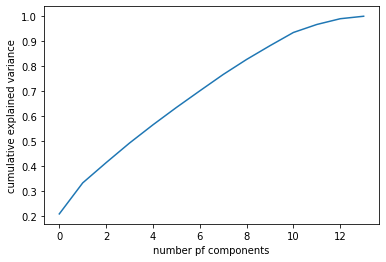

In [9]:
# Membuat Visualisasi Cumulative Explained Ratio
pca = PCA()
pca_data = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number pf components")
plt.ylabel("cumulative explained variance")

Berapa nilai n_components agar cumulative explained variance minimal 75%? Sekarang tentukan berapa n_components yang menurutmu cukup bagus lalu transform datamu.

In [10]:
# Implementasi pca sesuai grafik
# n = 0 - 14
n = 8 #minimal
pca = PCA(n_components=n)
X_new_pca = pca.fit_transform(X_scaled)
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var, '% of total variance is explained by',n, 'principal components')

76.68715479081388 % of total variance is explained by 8 principal components


## LDA

Text(0, 0.5, 'cumulative explained variance')

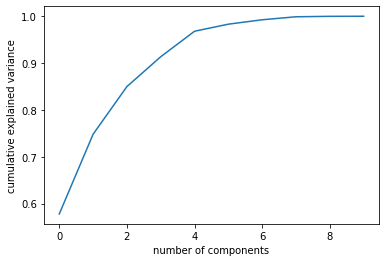

In [11]:
# Membuat Visualisasi Cumulative Explained Ratio
lda = LinearDiscriminantAnalysis()
lda_data = lda.fit_transform(X_scaled, Y)

plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

Berapa nilai n_components agar cumulative explained variance minimal 75%? Sekarang tentukan berapa n_components yang menurutmu cukup bagus lalu transform datamu.

In [12]:
# Implementasi Ida sesuai grafik
# >= 10 (100%)
# l = 2 #minimal
l = 3
lda = LinearDiscriminantAnalysis(n_components=l)
X_new_lda = lda.fit_transform(X_scaled, Y)
total_var = lda.explained_variance_ratio_.sum() * 100
print(total_var, '% of total variance is explained by',l, 'features')

84.99124363053907 % of total variance is explained by 3 features


#Model KNN
Buat model knn dari data asli dan data yang sudah dilakukan dimensional reduction

Evaluasi berdasarkan akurasi dan juga lama training hingga membuat prediksi. Berikut ada contoh menghitung waktu dengan library 'time'

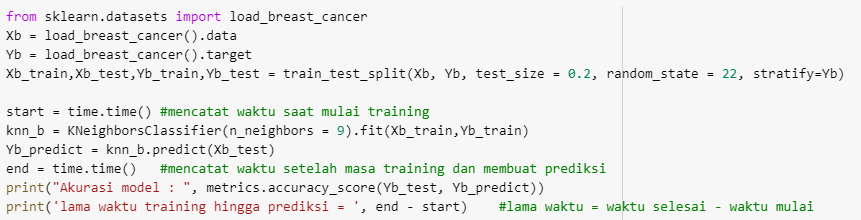

Kodingan diatas hanya contoh, tidak untuk diketik ulang. Nah silahkan memulai proses training data dengan knn

### MODEL KNN (BENTUK 1)

In [13]:
#Training dan Testing data asli dan data dengan feature selection
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 22, stratify=Y)
X_train_a,X_test_a,Y_train_a,Y_test_a = train_test_split(X_new_a, Y, test_size = 0.2, random_state = 22, stratify=Y)
X_train_pca,X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_new_pca, Y, test_size = 0.2, random_state = 22, stratify=Y)
X_train_lda,X_test_lda,Y_train_lda,Y_test_lda = train_test_split(X_new_lda, Y, test_size = 0.2, random_state = 22, stratify=Y)

In [14]:
#Train Model and Predict menggunakan data asli
start = time.time() 
k = 10
knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train,Y_train)
y_predict = knn.predict(X_test)
end = time.time()
print("Akurasi model dengan data asli: ", metrics.accuracy_score(Y_test, y_predict))
print('waktu training hingga prediksi = ', end - start)

Akurasi model dengan data asli:  0.42615319509098604
waktu training hingga prediksi =  0.6430542469024658


In [15]:
#Train Model and Predict menggunakan data dengan feature selection
start = time.time() 
k = 10
knn_a = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train_a,Y_train_a)
y_predict_a = knn_a.predict(X_test_a)
end = time.time()
print("Akurasi model dengan data feature selection: ", metrics.accuracy_score(Y_test_a, y_predict_a))
print('waktu training hingga prediksi = ', end - start)

Akurasi model dengan data feature selection:  0.4244604316546763
waktu training hingga prediksi =  0.18156671524047852


In [16]:
#Train Model and Predict menggunakan data dengan PCA
start = time.time() 
k = 25
knn_pca = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train_pca,Y_train_pca)
y_predict_pca = knn_pca.predict(X_test_pca)
end = time.time()
print("Akurasi model dengan data PCA ", metrics.accuracy_score(Y_test_pca, y_predict_pca))
print('waktu training hingga prediksi = ', end - start)

Akurasi model dengan data PCA  0.40964875158696573
waktu training hingga prediksi =  0.25217151641845703


In [17]:
#Train Model and Predict menggunakan data dengan LDA
start = time.time() 
k = 17
knn_lda = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train_lda,Y_train_lda)
y_predict_lda = knn_lda.predict(X_test_lda)
end = time.time()
print("Akurasi model dengan data LDA: ", metrics.accuracy_score(Y_test_lda, y_predict_lda))
print('waktu training hingga prediksi = ', end - start)

Akurasi model dengan data LDA:  0.38975878121032587
waktu training hingga prediksi =  0.13278937339782715


Apa yang dapat kamu simpulkan dari akurasi dan lama waktu training dari data sebelum dan sesudah dimensionality reduction?

Terlihat bahwa dengan jumlah feature yang lebih sedikit, tetap menghasilkan akurasi yang tidak jauh berbeda dan dengan waktu training hingga prediksi yang lebih singkat. Itulah salah 1 keuntungan menggunakan dimensional reduction, ini diperlukan saat menghadapi kasus data berdimensi tinggi (high dimensional data), seperti data genomics, gambar, dll

### MODEL KNN (BENTUK 2)

In [18]:
#Memisahkan Feature dan Label
#Feature (mengulang Kode diatas)
X = music2.iloc[:,:14].values
Y = music2.iloc[:, 14].values

In [19]:
scaler = StandardScaler()

# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.6578634  -0.86108     0.59301271 ... -0.22000411  0.33481231
   0.22582345]
 [-0.48893955 -0.54783734 -0.2323635  ...  0.8410691  -0.89146753
   0.22582345]
 [ 0.59750535 -2.15621793  1.25744056 ...  2.5868942   0.14687296
   0.22582345]
 ...
 [-0.5492976   0.19912594  1.28220184 ... -0.6092036   0.02828982
   0.22582345]
 [-0.85108785 -1.86707086  0.55587078 ...  0.28659404  0.05825067
   0.22582345]
 [-0.00607515 -0.75264985  0.75396107 ...  0.51558089 -0.26514691
   0.22582345]]


In [20]:
# Train Model and Predict menggunakan data asli
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size=0.2, random_state=22, stratify=Y)

start = time.time()
knn = KNeighborsClassifier(n_neighbors = 10, metric='euclidean').fit(X_scaled_train, Y_train)
Y_pred = knn.predict(X_scaled_test)
end = time.time()
print("Akurasi model : ", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')
print("lama waktu training hingga prediksi = ", end - start)

Akurasi model :  42.615319509098605 %
lama waktu training hingga prediksi =  0.6269056797027588


In [21]:
# Train Model and Predict menggunakan data dengan feature selection
from sklearn.model_selection import train_test_split
X_new_a_train, X_new_a_test, Y_train, Y_test = train_test_split( X_new_a, Y, test_size=0.2, random_state=22, stratify=Y)

start = time.time()
knn = KNeighborsClassifier(n_neighbors = 10, metric='euclidean').fit(X_new_a_train, Y_train)
Y_pred = knn.predict(X_new_a_test)
end = time.time()
print("Akurasi model : ", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')
print("lama waktu training hingga prediksi = ", end - start)

Akurasi model :  42.44604316546763 %
lama waktu training hingga prediksi =  0.16237497329711914


In [22]:
# Train Model and Predict menggunakan data dengan PCA
from sklearn.model_selection import train_test_split
X_new_pca_train, X_new_pca_test, Y_train, Y_test = train_test_split( X_new_pca, Y, test_size=0.2, random_state=22, stratify=Y)

start = time.time()
knn = KNeighborsClassifier(n_neighbors = 25, metric='euclidean').fit(X_new_pca_train, Y_train)
Y_pred = knn.predict(X_new_pca_test)
end = time.time()
print("Akurasi model : ", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')
print("lama waktu training hingga prediksi = ", end - start)

Akurasi model :  40.96487515869657 %
lama waktu training hingga prediksi =  0.25853586196899414


In [23]:
# Train Model and Predict menggunakan data dengan LDA
from sklearn.model_selection import train_test_split
X_new_lda_train, X_new_lda_test, Y_train, Y_test = train_test_split( X_new_lda, Y, test_size=0.2, random_state=22, stratify=Y)

start = time.time()
knn = KNeighborsClassifier(n_neighbors = 17, metric='euclidean').fit(X_new_lda_train, Y_train)
Y_pred = knn.predict(X_new_lda_test)
end = time.time()
print("Akurasi model : ", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')
print("lama waktu training hingga prediksi = ", end - start)

Akurasi model :  38.975878121032586 %
lama waktu training hingga prediksi =  0.09444713592529297


### MODEL KNN (BENTUK 3)

In [24]:
#Training dan Testing data asli dan data dengan feature selection

# Raw
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(X, Y, test_size=0.3, random_state=42)

# Feature Selection
x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(X_new_a, Y, test_size=0.3, random_state=42)

# PCA
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_new_pca, Y, test_size=0.3, random_state=42)

# LCA
x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(X_new_lda, Y, test_size=0.3, random_state=42)

Diagram Akurasi nilai K pada Data Asli

Maximum accuracy:- 0.32900677200902934 at K = 92


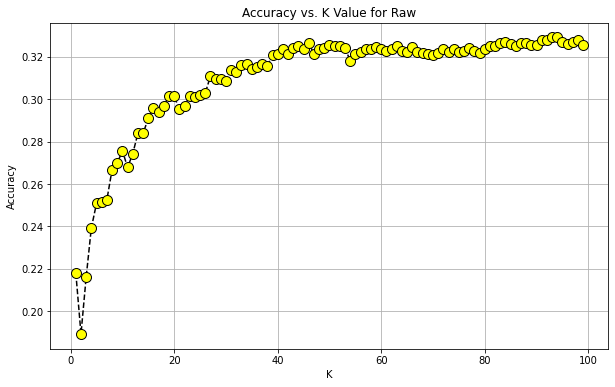

In [25]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_raw,y_train_raw)
    yhat = neigh.predict(x_test_raw)
    acc.append(metrics.accuracy_score(y_test_raw, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),acc,color = 'black',linestyle='dashed', 
         marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy vs. K Value for Raw')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Diagram Akurasi nilai K pada Data Feature Selection

Maximum accuracy:- 0.4463882618510158 at K = 40


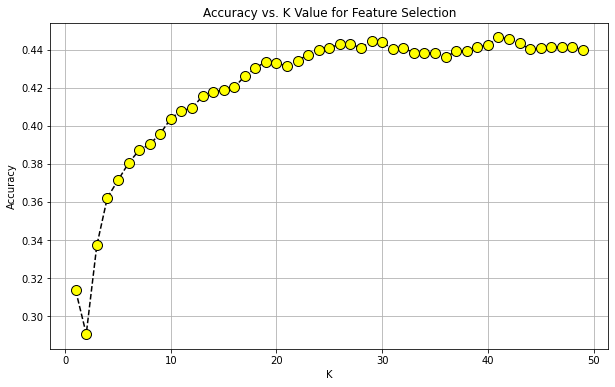

In [26]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_fs,y_train_fs)
    yhat = neigh.predict(x_test_fs)
    acc.append(metrics.accuracy_score(y_test_fs, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'black',linestyle='dashed', 
         marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy vs. K Value for Feature Selection')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Diagram Akurasi nilai K pada Data PCA

Maximum accuracy:- 0.41788939051918733 at K = 40


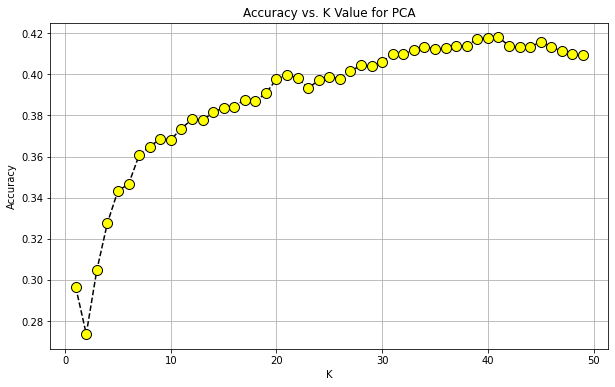

In [27]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_pca,y_train_pca)
    yhat = neigh.predict(x_test_pca)
    acc.append(metrics.accuracy_score(y_test_pca, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'black',linestyle='dashed', 
         marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy vs. K Value for PCA')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Diagram Akurasi nilai K pada Data LDA

Maximum accuracy:- 0.4136568848758465 at K = 47


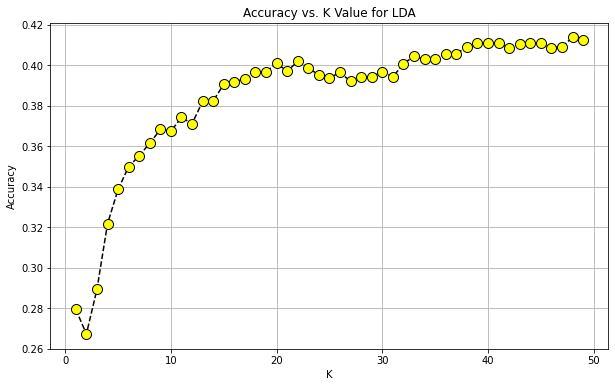

In [28]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_lda,y_train_lda)
    yhat = neigh.predict(x_test_lda)
    acc.append(metrics.accuracy_score(y_test_lda, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'black',linestyle='dashed', 
         marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Accuracy vs. K Value for LDA')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [29]:
n=95
knn = KNeighborsClassifier(n_neighbors=n)

# Train Model and Predict menggunakan data asli
model_raw = knn.fit(x_train_raw, y_train_raw)
pred_raw = model_raw.predict(x_test_raw)
print("Akurasi model data Asli : ", metrics.accuracy_score(y_test_raw, pred_raw))

Akurasi model data Asli :  0.3270316027088036


In [30]:
# Train Model and Predict menggunakan data dengan feature selection
model_fs = knn.fit(x_train_fs, y_train_fs)
pred_fs = model_fs.predict(x_test_fs)
print("Akurasi model data Feature Selectiion : ", metrics.accuracy_score(y_test_fs, pred_fs))

Akurasi model data Feature Selectiion :  0.43876975169300225


In [31]:
# Train Model and Predict menggunakan data dengan PCA
model_pca = knn.fit(x_train_pca, y_train_pca)
pred_pca = model_pca.predict(x_test_pca)
print("Akurasi model data PCA : ", metrics.accuracy_score(y_test_pca, pred_pca))

Akurasi model data PCA :  0.4153498871331828


In [32]:
# Train Model and Predict menggunakan data dengan LDA
model_lda = knn.fit(x_train_lda, y_train_lda)
pred_lda = model_lda.predict(x_test_lda)
print("Akurasi model data LDA : ", metrics.accuracy_score(y_test_lda, pred_lda))

Akurasi model data LDA :  0.41732505643340856


# Tambahan

Pembagian Training dan Testing Data Asli & Data dengan Feature Selection

In [33]:
from sklearn.model_selection import train_test_split

X_scaled_train, X_scaled_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size=0.2, random_state=22, stratify=Y)
print ('Train set data asli:', X_scaled_train.shape,  Y_train.shape)
print ('Test set data asli :', X_scaled_test.shape,  Y_test.shape)

X_new_a_train, X_new_a_test, Y_train, Y_test = train_test_split( X_new_a, Y, test_size=0.2, random_state=22, stratify=Y)
print ('Train set data dengan feature selection :', X_new_a_train.shape,  Y_train.shape)
print ('Test set data dengan feature selection :', X_new_a_test.shape,  Y_test.shape)

Train set data asli: (9450, 14) (9450,)
Test set data asli : (2363, 14) (2363,)
Train set data dengan feature selection : (9450, 7) (9450,)
Test set data dengan feature selection : (2363, 7) (2363,)


Pembentukan Model dan Akurasi Data Training & Testing yang sudah di Normalisasi dari Data Asli

In [34]:
scaler = StandardScaler()

# transform data
X_train_scaled = scaler.fit_transform(X_scaled_train)
X_test_scaled = scaler.fit_transform(X_scaled_test)

# knn after normalization
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train_scaled,Y_train)
Y_pred = knn.predict(X_test_scaled)

# Accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_train_scaled)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Train set Accuracy:  0.54994708994709
Test set Accuracy:  0.4282691493863732


Pembentukan Model Training dan Akurasi dari Data Asli

In [35]:
#Train Model and Predict menggunakan data asli
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_scaled_train,Y_train)
Y_pred = knn.predict(X_scaled_test)

# Accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_scaled_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Train set Accuracy:  0.5488888888888889
Test set Accuracy:  0.42615319509098604


Pembentukan Model Training dan Akurasi dari Data Feature Selection

In [36]:
#Train Model and Predict menggunakan data dengan feature selection
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_new_a_train,Y_train)
Y_pred = knn.predict(X_new_a_test)

# Accuracyfrom sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Pembentukan Model Training dan Akurasi dari Data PCA

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Train & Test Data PCA
X_new_pca_train, X_new_pca_test, Y_train, Y_test = train_test_split( X_new_pca, Y, test_size=0.2, random_state=22, stratify=Y)

#Train Model and Predict menggunakan data dengan PCA
knn = KNeighborsClassifier(n_neighbors = 25).fit(X_new_pca_train,Y_train)
Y_pred = knn.predict(X_new_pca_test)

# Accuracy
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_new_pca_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Train set Accuracy:  0.4785185185185185
Test set Accuracy:  0.40964875158696573


Pembentukan Model Training dan Akurasi dari Data LDA

In [38]:
#Train Model and Predict menggunakan data dengan LDA
X_new_lda_train, X_new_lda_test, Y_train, Y_test = train_test_split( X_new_lda, Y, test_size=0.2, random_state=22, stratify=Y)

#Train Model and Predict menggunakan data dengan LDA
knn = KNeighborsClassifier(n_neighbors = 17).fit(X_new_lda_train,Y_train)
Y_pred = knn.predict(X_new_lda_test)

# Accuracy
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_new_lda_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Train set Accuracy:  0.4702645502645503
Test set Accuracy:  0.38975878121032587
